In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#trainデータ,testデータ,sampleデータの読み込み
df = pd.read_csv('../datasets/mushroom.csv')

In [3]:
df.head()

,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat,Class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [4]:
df.shape

(8124, 23)

In [5]:
# create NaN data
num_nan = 10
missing_x = np.random.randint(0, df.shape[0], (num_nan, 1))
missing_y = np.random.randint(0, df.shape[1], (num_nan, 1))

for i, j in zip(missing_x, missing_y):
    df.iloc[i, j] = np.nan

In [6]:
df[df.isnull().any(axis=1)]

,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat,Class
1595,f,f,g,NaN,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
2682,f,f,n,t,n,f,c,b,u,t,...,NaN,g,p,w,o,p,k,v,d,e
2822,x,y,e,t,n,f,NaN,b,n,t,...,p,g,p,w,o,p,n,y,d,e
4348,x,y,y,f,f,f,c,b,g,e,...,p,p,p,w,NaN,l,h,y,g,p
4403,f,y,g,f,f,f,c,b,p,e,...,b,b,p,NaN,o,l,h,y,d,p
4457,f,f,g,f,f,f,c,NaN,h,e,...,p,b,p,w,o,l,h,y,g,p
4610,x,y,n,f,y,NaN,c,n,b,t,...,p,w,p,w,o,e,w,v,d,p
7322,k,s,n,f,f,f,c,n,b,t,...,p,p,p,w,o,NaN,w,v,l,p
7463,x,s,g,f,n,f,w,b,w,NaN,...,w,w,p,w,t,p,w,s,g,e
7473,k,s,n,f,f,f,c,n,b,t,...,w,p,p,w,o,e,w,NaN,d,p


In [7]:
df.dropna(inplace=True)
df.shape

(8114, 23)

In [8]:
X=df.iloc[:,:22]
y=df['Class']

In [9]:
X.head(n=10)

,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
5,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g
6,b,s,w,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,n,m
7,b,y,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,s,m
8,x,y,w,t,p,f,c,n,p,e,...,s,w,w,p,w,o,p,k,v,g
9,b,s,y,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,s,m


In [10]:
X=pd.get_dummies(X)
X.head(n=10)

,Cap-shape_b,Cap-shape_c,Cap-shape_f,Cap-shape_k,Cap-shape_s,Cap-shape_x,Cap-surface_f,Cap-surface_g,Cap-surface_s,Cap-surface_y,...,Population_s,Population_v,Population_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [11]:
from collections import Counter
print(Counter(y))

Counter({'e': 4204, 'p': 3910})


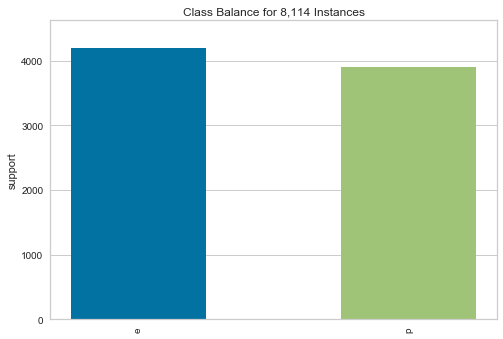

In [12]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [14]:
X = np.array(X)
y = np.array(y)

# scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [16]:
# learning
kernel = ['linear', 'rbf', 'poly']
clf_SVM = []

for i in kernel:
    svm = SVC(C=1.0, gamma='auto', kernel=i, random_state=42)
    clf_SVM.append(svm.fit(X_train, y_train))

In [17]:
from sklearn import metrics

In [18]:
def calc_metrics(y_test, y_pred):
    pre = metrics.precision_score(y_test, y_pred, average='micro')
    recall = metrics.recall_score(y_test, y_pred, average='micro')
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='micro')
    metrics_list = [pre, recall, acc, f1]
    
    return metrics_list

In [19]:
result = []

for i in range(len(clf_SVM)):
    y_pred = clf_SVM[i].predict(X_test)
    result.append(calc_metrics(y_test, y_pred))

In [20]:
result_df = pd.DataFrame(result, columns=['Precision', 'Recall', 'Acc', 'F-score'])
result_df = result_df.assign(Kernel=kernel)
result_df = result_df[['Kernel', 'Precision', 'Recall', 'Acc', 'F-score']]
round(result_df, 3)

,Kernel,Precision,Recall,Acc,F-score
0,linear,1.0,1.0,1.0,1.0
1,rbf,1.0,1.0,1.0,1.0
2,poly,1.0,1.0,1.0,1.0


In [21]:
result_mlt = pd.melt(result_df, id_vars='Kernel', var_name='Metrics', value_name='values')
result_mlt

,Kernel,Metrics,values
0,linear,Precision,1.000000
1,rbf,Precision,0.999692
2,poly,Precision,1.000000
3,linear,Recall,1.000000
4,rbf,Recall,0.999692
5,poly,Recall,1.000000
6,linear,Acc,1.000000
7,rbf,Acc,0.999692
8,poly,Acc,1.000000
9,linear,F-score,1.000000


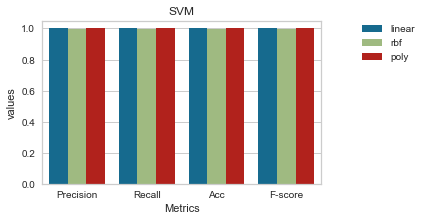

In [22]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Metrics', y='values', hue='Kernel', data=result_mlt)
plt.title('SVM')
plt.legend(loc='best', bbox_to_anchor=(1.35, 1), borderaxespad=0)

In [23]:
from sklearn.model_selection import GridSearchCV

In [26]:
tuning_parm = [
    {'C': [0.01,0.1,1, 10, 100], 'kernel': ['linear'],'gamma': [100,10,1,0.1,0.1,0.001 ]},
    {'C': [0.01,0.1,1, 10, 100], 'kernel': ['rbf'], 'gamma': [100,10,1,0.1,0.1,0.01]},
    {'C': [0.01,0.1,1, 10, 100], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [100,10,1,0.1,0.1,0.01]}
]

clf_SVM = GridSearchCV(SVC(), tuning_parm, cv=5, scoring='f1_micro', return_train_score=True)

In [27]:
clf_SVM.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [100, 10, 1, 0.1, 0.1, 0.001],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [100, 10, 1, 0.1, 0.1, 0.01],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4],
                          'gamma': [100, 10, 1, 0.1, 0.1, 0.01],
                          'kernel': ['poly']}],
             pre_dis

In [28]:
grid_df = pd.DataFrame.from_dict(clf_SVM.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,param_degree,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.102211,0.008556,0.023537,0.000907,0.01,100,linear,NaN,"{'C': 0.01, 'gamma': 100, 'kernel': 'linear'}",0.998973,...,0.999178,0.000411,111,0.999486,0.999743,0.999486,0.999486,0.999743,0.999589,0.000126
1,0.099533,0.008072,0.023997,0.000874,0.01,10,linear,NaN,"{'C': 0.01, 'gamma': 10, 'kernel': 'linear'}",0.998973,...,0.999178,0.000411,111,0.999486,0.999743,0.999486,0.999486,0.999743,0.999589,0.000126
2,0.106618,0.014031,0.024135,0.001846,0.01,1,linear,NaN,"{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}",0.998973,...,0.999178,0.000411,111,0.999486,0.999743,0.999486,0.999486,0.999743,0.999589,0.000126
3,0.099074,0.008709,0.023464,0.000997,0.01,0.1,linear,NaN,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}",0.998973,...,0.999178,0.000411,111,0.999486,0.999743,0.999486,0.999486,0.999743,0.999589,0.000126
4,0.099466,0.007686,0.023580,0.000873,0.01,0.1,linear,NaN,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}",0.998973,...,0.999178,0.000411,111,0.999486,0.999743,0.999486,0.999486,0.999743,0.999589,0.000126


In [29]:
col = ['mean_train_score', 'params']
grid_df = grid_df[col]
grid_df.sort_values(by=['mean_train_score'], ascending=False)

,mean_train_score,params
75,1.000000,"{'C': 0.01, 'degree': 4, 'gamma': 0.1, 'kernel..."
73,1.000000,"{'C': 0.01, 'degree': 4, 'gamma': 10, 'kernel'..."
98,1.000000,"{'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'p..."
99,1.000000,"{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': ..."
100,1.000000,"{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': ..."
101,1.000000,"{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel':..."
102,1.000000,"{'C': 1, 'degree': 3, 'gamma': 100, 'kernel': ..."
103,1.000000,"{'C': 1, 'degree': 3, 'gamma': 10, 'kernel': '..."
104,1.000000,"{'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'p..."
105,1.000000,"{'C': 1, 'degree': 3, 'gamma': 0.1, 'kernel': ..."


In [30]:
clf_SVM.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
clf_SVM=SVC(C=0.1,kernel='linear',degree=3,gamma=100)
clf_SVM.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
# predict label
y_pred = clf_SVM.predict(X_test)

In [33]:
confusion_matrix(y_test, y_pred)

array([[1705,    0],
       [   0, 1541]])

In [34]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 1.0


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
tuned_parameters = [
    {'C': [0.001,0.01,0.1,1, 10, 100, 1000]}
    ]

In [37]:
score = 'f1'
clf_LR = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5)

In [38]:
clf_LR.fit(X_train, y_train) 

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
grid_df = pd.DataFrame.from_dict(clf_LR.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036535,0.012025,0.002695,0.002580,0.001,{'C': 0.001},0.995893,0.994867,0.997947,0.99692,0.993827,0.995892,0.001455,7
1,0.041507,0.003873,0.001529,0.000203,0.01,{'C': 0.01},0.998973,0.998973,0.998973,1.00000,0.998971,0.999178,0.000411,6
2,0.066821,0.003206,0.001647,0.000356,0.1,{'C': 0.1},0.998973,0.998973,1.000000,1.00000,0.998971,0.999384,0.000503,5
3,0.078482,0.007294,0.001493,0.000138,1,{'C': 1},1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1
4,0.082838,0.004654,0.001528,0.000095,10,{'C': 10},1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1


In [41]:
clf_LR.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# learning
clf_LR = LogisticRegression(penalty='l2', C=1)
clf_LR.fit(X_train, y_train)
y_pred = clf_LR.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
confusion_matrix(y_test, y_pred)

array([[1705,    0],
       [   0, 1541]])

In [44]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 1.0


In [45]:
from sklearn.neighbors import KNeighborsClassifier

[1] score: 1.00
[2] score: 1.00
[3] score: 1.00
[4] score: 1.00
[5] score: 1.00
[6] score: 1.00
[7] score: 1.00
[8] score: 1.00
[9] score: 1.00
[10] score: 1.00
[11] score: 1.00
[12] score: 1.00
[13] score: 1.00
[14] score: 1.00
[15] score: 1.00
[16] score: 1.00
[17] score: 1.00
[18] score: 1.00
[19] score: 1.00
[20] score: 1.00
[21] score: 1.00
[22] score: 1.00
[23] score: 1.00
[24] score: 1.00
[25] score: 1.00
[26] score: 1.00
[27] score: 1.00
[28] score: 1.00
[29] score: 1.00
[30] score: 1.00


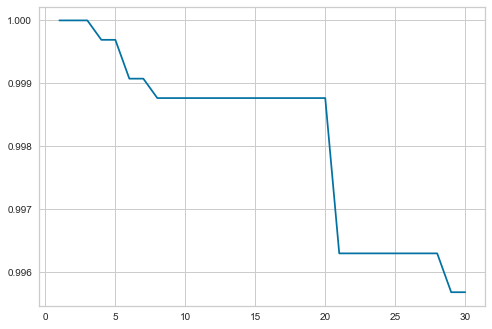

In [46]:
list_score = []
list_nn = []
for k in range(1,31):
    knc_brute = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    clf=knc_brute
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    list_score.append(acc)
    list_nn.append(k)
    print("[%d] score: {:.2f}".format(acc) % k)
    
plt.plot(list_nn, list_score)

[1] score: 1.00
[2] score: 1.00
[3] score: 1.00
[4] score: 1.00
[5] score: 1.00
[6] score: 1.00
[7] score: 1.00
[8] score: 1.00
[9] score: 1.00
[10] score: 1.00
[11] score: 1.00
[12] score: 1.00
[13] score: 1.00
[14] score: 1.00
[15] score: 1.00
[16] score: 1.00
[17] score: 1.00
[18] score: 1.00
[19] score: 1.00
[20] score: 1.00
[21] score: 1.00
[22] score: 1.00
[23] score: 1.00
[24] score: 1.00
[25] score: 1.00
[26] score: 1.00
[27] score: 1.00
[28] score: 1.00
[29] score: 1.00
[30] score: 1.00


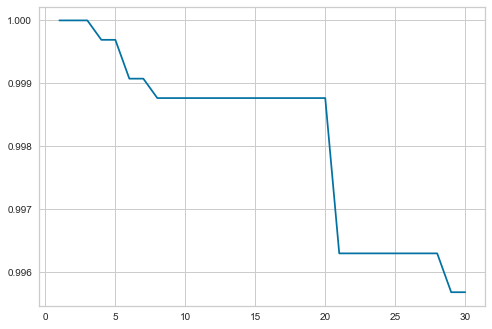

In [47]:
list_score = []
list_nn = []
for k in range(1,31):
    knc_ball = KNeighborsClassifier(n_neighbors=k,algorithm='ball_tree')
    clf = knc_ball
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    list_score.append(acc)
    list_nn.append(k)
    print("[%d] score: {:.2f}".format(acc) % k)
    
plt.plot(list_nn, list_score)

[1] score: 1.00
[2] score: 1.00
[3] score: 1.00
[4] score: 1.00
[5] score: 1.00
[6] score: 1.00
[7] score: 1.00
[8] score: 1.00
[9] score: 1.00
[10] score: 1.00
[11] score: 1.00
[12] score: 1.00
[13] score: 1.00
[14] score: 1.00
[15] score: 1.00
[16] score: 1.00
[17] score: 1.00
[18] score: 1.00
[19] score: 1.00
[20] score: 1.00
[21] score: 1.00
[22] score: 1.00
[23] score: 1.00
[24] score: 1.00
[25] score: 1.00
[26] score: 1.00
[27] score: 1.00
[28] score: 1.00
[29] score: 1.00
[30] score: 1.00


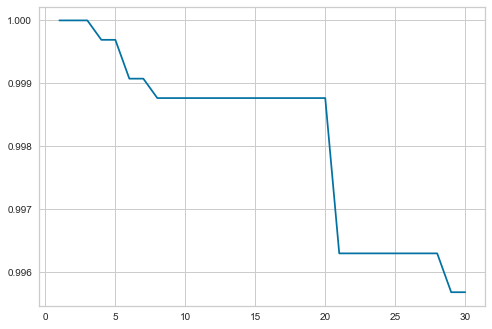

In [48]:
list_score = []
list_nn = []
for k in range(1,31):
    knc_kd = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    clf = knc_kd
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    list_score.append(acc)
    list_nn.append(k)
    print("[%d] score: {:.2f}".format(acc) % k)
    
plt.plot(list_nn, list_score)

In [49]:
knc=KNeighborsClassifier(n_neighbors=15,algorithm='brute')
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [50]:
y_pred=knc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1705,    0],
       [   4, 1537]])

In [51]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.9987677141096735


In [52]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [53]:
clf_DT=DecisionTreeClassifier(criterion='gini',max_depth=10)
clf_DT=clf_DT.fit(X_train,y_train)

y_pred=clf_DT.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

1.0


In [54]:
dot = StringIO()
export_graphviz(clf_DT, out_file = dot)
graph = pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_pdf("../graph/KEEL_graph_gini.pdf")

True

In [55]:
clf_DT=DecisionTreeClassifier(criterion='entropy',max_depth=10)
clf_DT=clf_DT.fit(X_train,y_train)

y_pred=clf_DT.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

1.0


In [56]:
dot = StringIO()
export_graphviz(clf_DT, out_file = dot)
graph = pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_pdf("../graph/KEEL_graph_entropy.pdf")

True